# Descriptive statistics to regression analysis

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings


# Ignore warnings
warnings.filterwarnings('ignore')

In [217]:
# Load the merged dataset
data = pd.read_excel('merged_aggregated_data.xlsx')

In [218]:
data

,Sl,author.name,DEI,exclamation_count,text_sentiment,text_subjectivity,week_start,week_end,word_count,emoji_count,...,caucasian/white,hispanic/latin american,black/african american,asian (exclude indian/south asian),indian/south asian,female,total_dir,dei_dir,dei_dir_perc,Industry
0,0,Cadillac,0,0.000000,0.101010,0.262626,2014-12-29,2015-01-04,18,0,...,9,0,0,0,0,4,9,0,0.000000,Automobiles
1,1,Cadillac,0,0.000000,0.025000,0.141667,2015-01-05,2015-01-11,36,0,...,9,0,0,0,0,4,9,0,0.000000,Automobiles
2,2,Cadillac,0,0.000000,0.136660,0.397948,2015-01-12,2015-01-18,144,0,...,9,0,0,0,0,4,9,0,0.000000,Automobiles
3,3,Cadillac,0,0.000000,0.134978,0.366753,2015-01-19,2015-01-25,62,0,...,9,0,0,0,0,4,9,0,0.000000,Automobiles
4,4,Cadillac,0,0.000000,0.097348,0.226810,2015-01-26,2015-02-01,86,0,...,9,0,0,0,0,4,9,0,0.000000,Automobiles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110,5110,kate spade new york,0,0.000000,0.369697,0.437879,2022-11-14,2022-11-20,211,0,...,7,0,2,1,1,5,11,4,0.363636,"Apparel, Accessories, and Luxury Goods"
5111,5111,kate spade new york,0,0.000000,0.000000,0.000000,2022-12-26,2023-01-01,3,0,...,7,0,2,1,1,5,11,4,0.363636,"Apparel, Accessories, and Luxury Goods"
5112,5112,kate spade new york,0,0.333333,0.207504,0.423028,2023-02-06,2023-02-12,151,4,...,7,0,2,1,1,5,11,4,0.363636,"Apparel, Accessories, and Luxury Goods"
5113,5113,kate spade new york,0,0.230769,0.145155,0.367168,2023-02-13,2023-02-19,218,2,...,7,0,2,1,1,5,11,4,0.363636,"Apparel, Accessories, and Luxury Goods"


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5115 entries, 0 to 5114
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sl                                  5115 non-null   int64  
 1   author.name                         5115 non-null   object 
 2   DEI                                 5115 non-null   int64  
 3   exclamation_count                   5115 non-null   float64
 4   text_sentiment                      5115 non-null   float64
 5   text_subjectivity                   5115 non-null   float64
 6   week_start                          5115 non-null   object 
 7   week_end                            5115 non-null   object 
 8   word_count                          5115 non-null   int64  
 9   emoji_count                         5115 non-null   int64  
 10  question_count                      5115 non-null   int64  
 11  hashtag_count                       5115 no

In [220]:
### 1. Descriptive Statistics
print("Descriptive Statistics:")
print(data[['dei_dir_perc', 'dei_brand_percn']].describe())

Descriptive Statistics:
       dei_dir_perc  dei_brand_percn
count   5115.000000      5115.000000
mean       0.238881         0.180818
std        0.106460         0.251276
min        0.000000         0.000000
25%        0.181818         0.000000
50%        0.250000         0.000000
75%        0.294118         0.375000
max        1.000000         1.000000


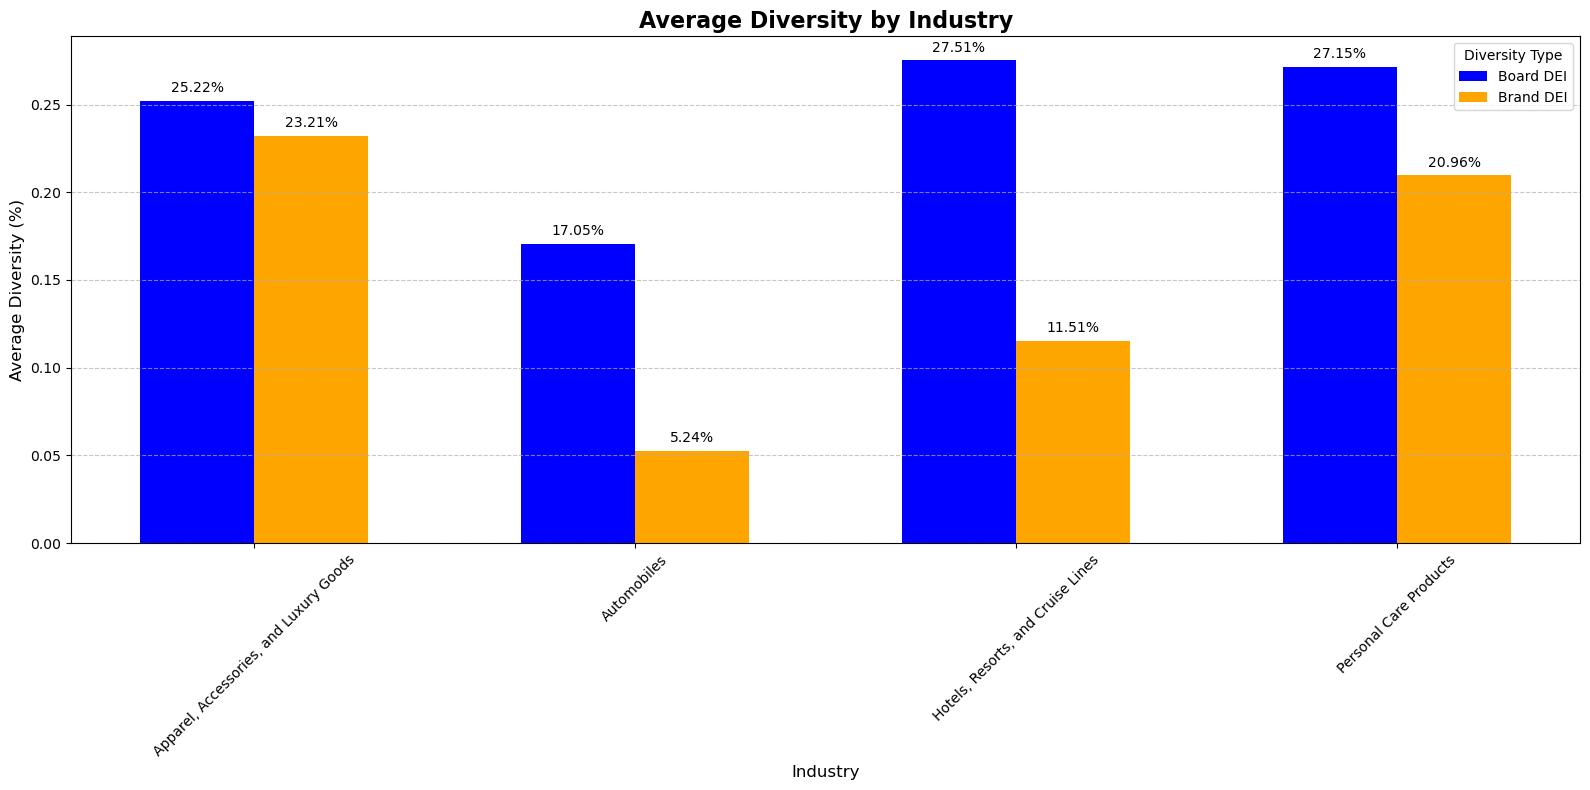

In [221]:
# Calculate average diversity for each industry
industry_avg = industry_data.groupby('Industry')[['dei_dir_perc', 'dei_brand_percn']].mean().reset_index()

# Bar chart for industry comparison
plt.figure(figsize=(16, 8))
x = np.arange(len(industry_avg['Industry']))  # Position of bars
bar_width = 0.30

# Bar chart for Board DEI
board_bars = plt.bar(x - bar_width / 2, industry_avg['dei_dir_perc'], width=bar_width, label='Board DEI', color='blue')
# Bar chart for Brand DEI
brand_bars = plt.bar(x + bar_width / 2, industry_avg['dei_brand_percn'], width=bar_width, label='Brand DEI', color='orange')

# Add annotations (percentage values on the bars)
for bar in board_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.005, f'{height:.2%}', ha='center', fontsize=10)

for bar in brand_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.005, f'{height:.2%}', ha='center', fontsize=10)

# Enhancing title and labels
plt.title('Average Diversity by Industry', fontsize=16, fontweight='bold')
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Average Diversity (%)', fontsize=12)
plt.xticks(ticks=x, labels=industry_avg['Industry'], rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Diversity Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()




| **Industry**                          | **Board DEI (%)** | **Brand DEI (%)** | **Observation**                                                                 |
|---------------------------------------|-------------------|-------------------|---------------------------------------------------------------------------------|
| Apparel, Accessories, and Luxury Goods | 25.22            | 23.21            | High alignment between board and brand diversity.                              |
| Automobiles                           | 17.05            | 5.24             | Significant gap; branding underrepresents board diversity.                     |
| Hotels, Resorts, and Cruise Lines     | 27.51            | 11.51            | Largest gap, indicating opportunity to align branding with board diversity.    |
| Personal Care Products                | 27.15            | 20.96            | Stronger alignment, but branding diversity can still improve.                 |

Industries show varying levels of alignment between board and brand DEI, with Hotels and Automobiles exhibiting the largest gaps, suggesting targeted focus areas for improved diversity representation in branding

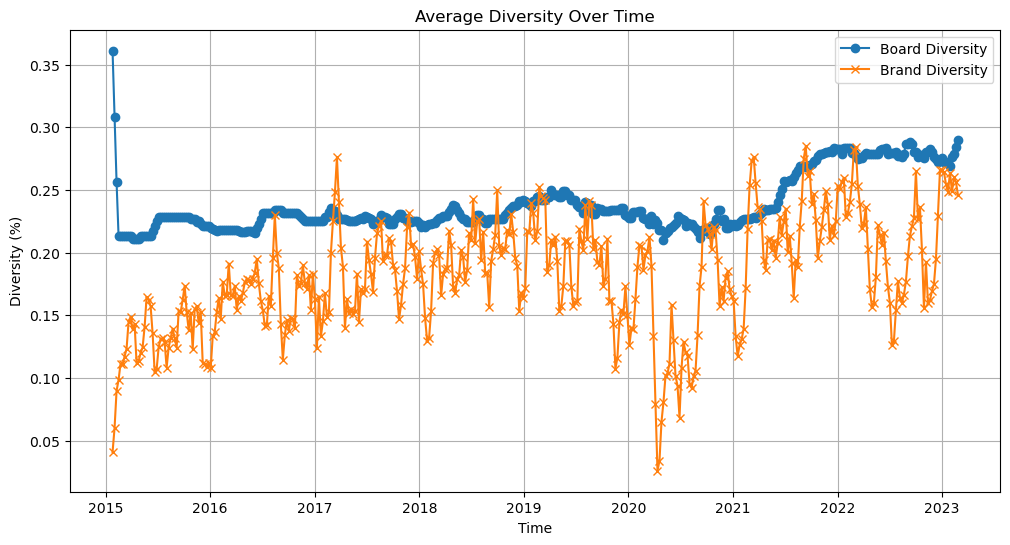

In [222]:
# Time Trends with Rolling Averages
plt.figure(figsize=(12, 6))

# Rolling averages for smoother trends
rolling_window = 4  # Adjust based on your preference
avg_board_diversity_rolling = avg_board_diversity.rolling(rolling_window).mean()
avg_brand_diversity_rolling = avg_brand_diversity.rolling(rolling_window).mean()

plt.plot(avg_board_diversity_rolling, label='Board Diversity', marker='o')
plt.plot(avg_brand_diversity_rolling, label='Brand Diversity', marker='x')
plt.title('Average Diversity Over Time')
plt.xlabel('Time')
plt.ylabel('Diversity (%)')
plt.legend()
plt.grid()
plt.show()


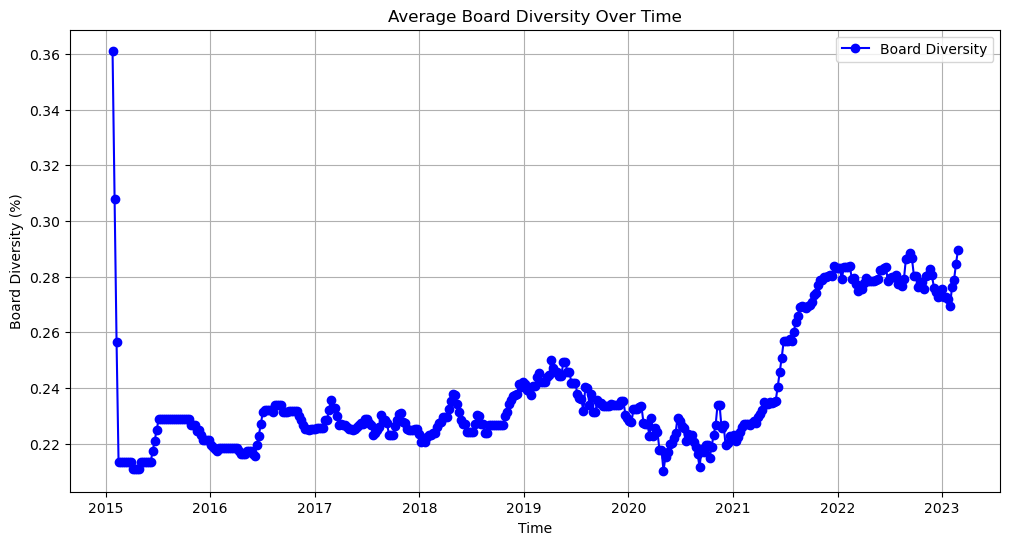

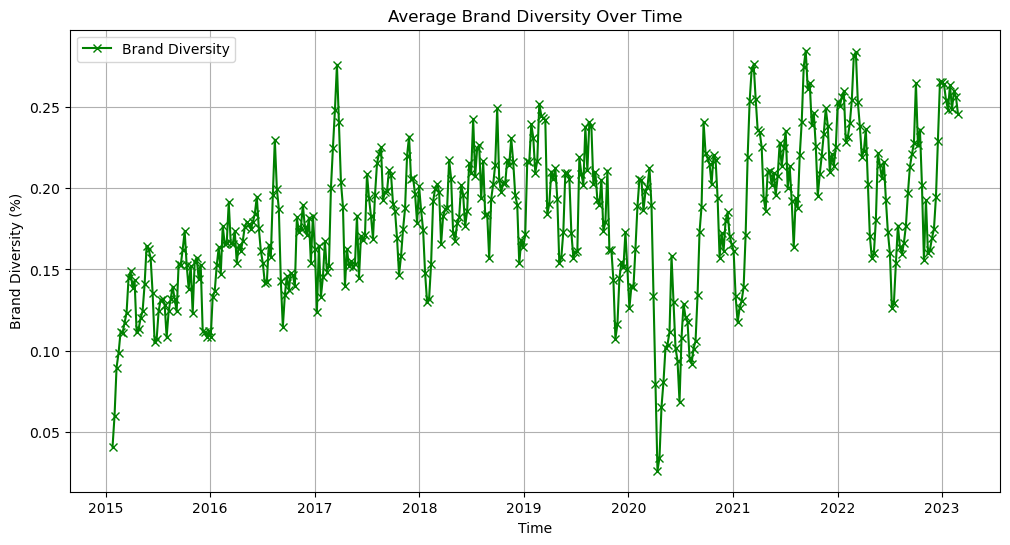

In [253]:
# Rolling averages for smoother trends
rolling_window = 4  # Adjust based on your preference
avg_board_diversity_rolling = avg_board_diversity.rolling(rolling_window).mean()
avg_brand_diversity_rolling = avg_brand_diversity.rolling(rolling_window).mean()

# Plot 1: Board Diversity
plt.figure(figsize=(12, 6))
plt.plot(avg_board_diversity_rolling, label='Board Diversity', marker='o', color='blue')
plt.title('Average Board Diversity Over Time')
plt.xlabel('Time')
plt.ylabel('Board Diversity (%)')
plt.legend()
plt.grid()
plt.show()

# Plot 2: Brand Diversity
plt.figure(figsize=(12, 6))
plt.plot(avg_brand_diversity_rolling, label='Brand Diversity', marker='x', color='green')
plt.title('Average Brand Diversity Over Time')
plt.xlabel('Time')
plt.ylabel('Brand Diversity (%)')
plt.legend()
plt.grid()
plt.show()


#### Insights

1. **Board Diversity Over Time:** Board diversity remained `relatively stable` between 2015 and 2020, with slight fluctuations. A significant upward trend is observed post-2021, indicating increased focus on board-level DEI initiatives.

2. **Brand Diversity Over Time:** Brand diversity shows `more variability` compared to board diversity. A gradual upward trend is visible, with periodic dips, suggesting inconsistent efforts in aligning branding with DEI principles.

3. **Key Observation:** Post-2021, both board and brand diversity show an `upward trend`, indicating a growing organizational commitment to DEI representation.

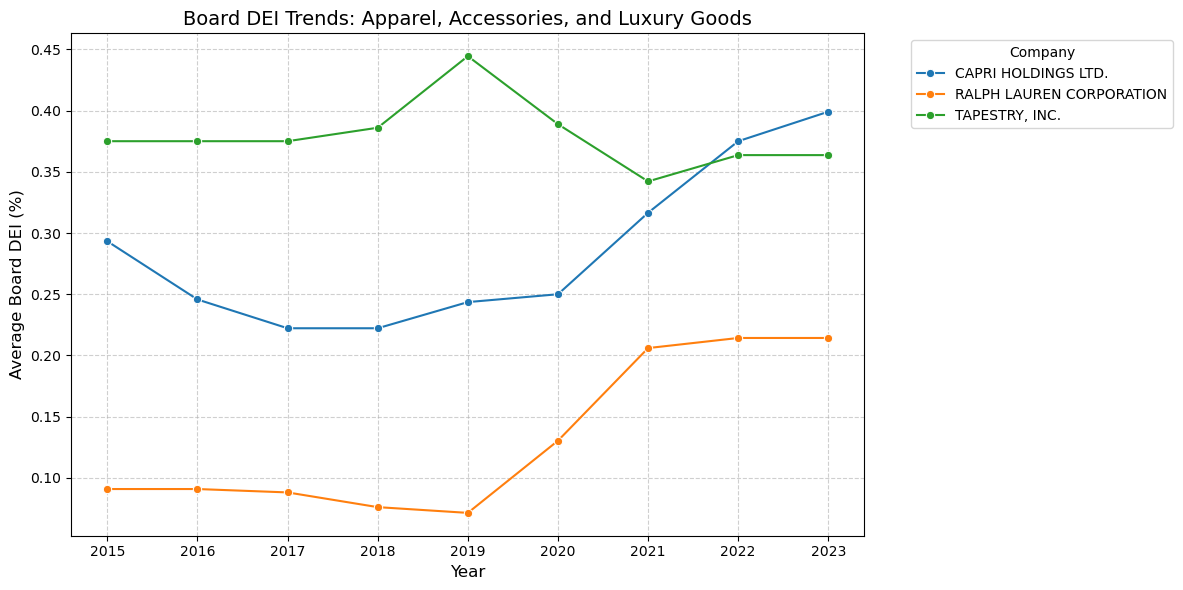

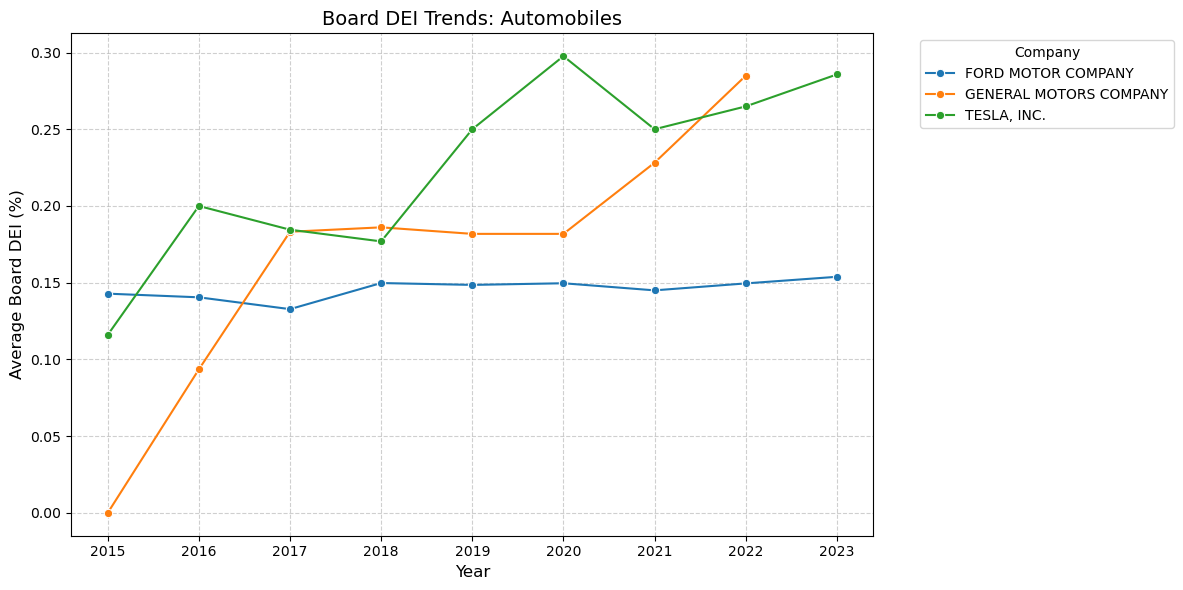

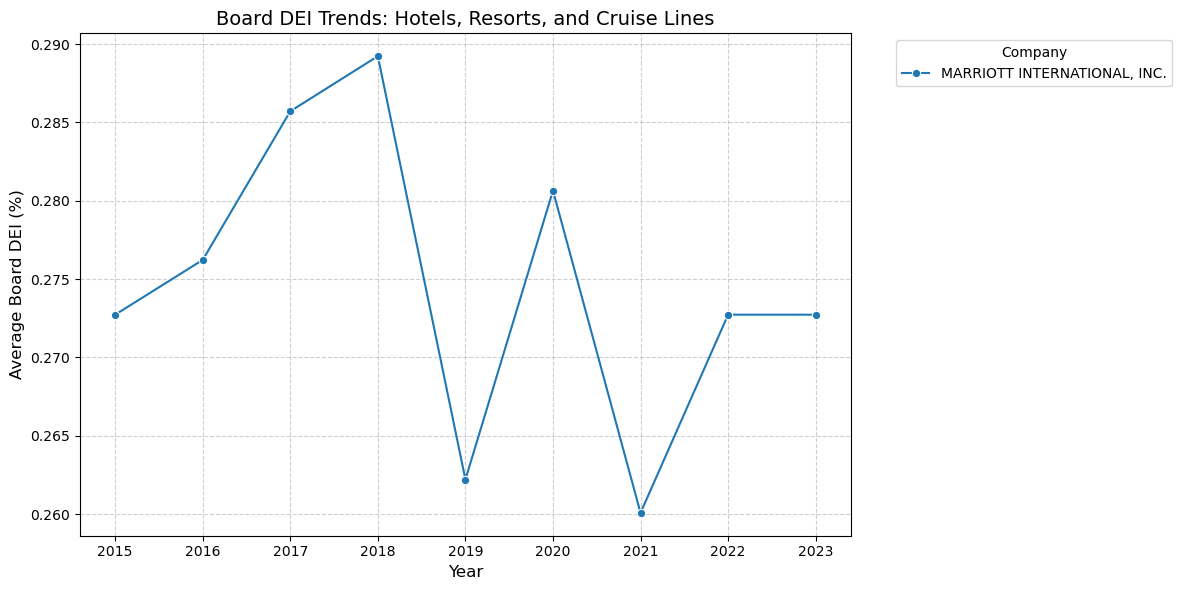

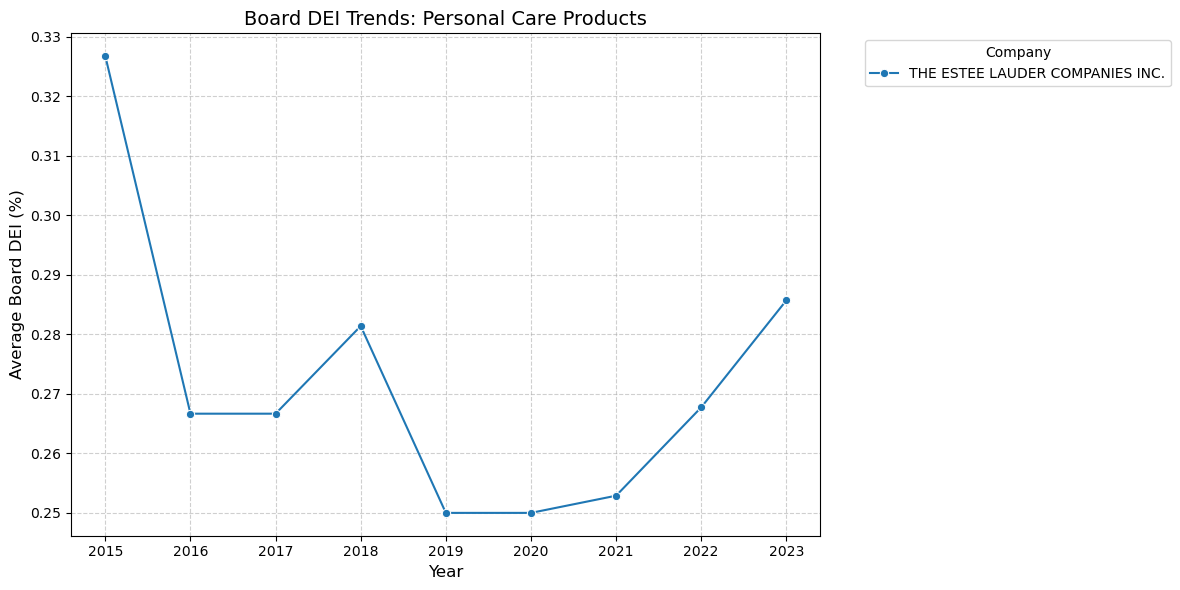

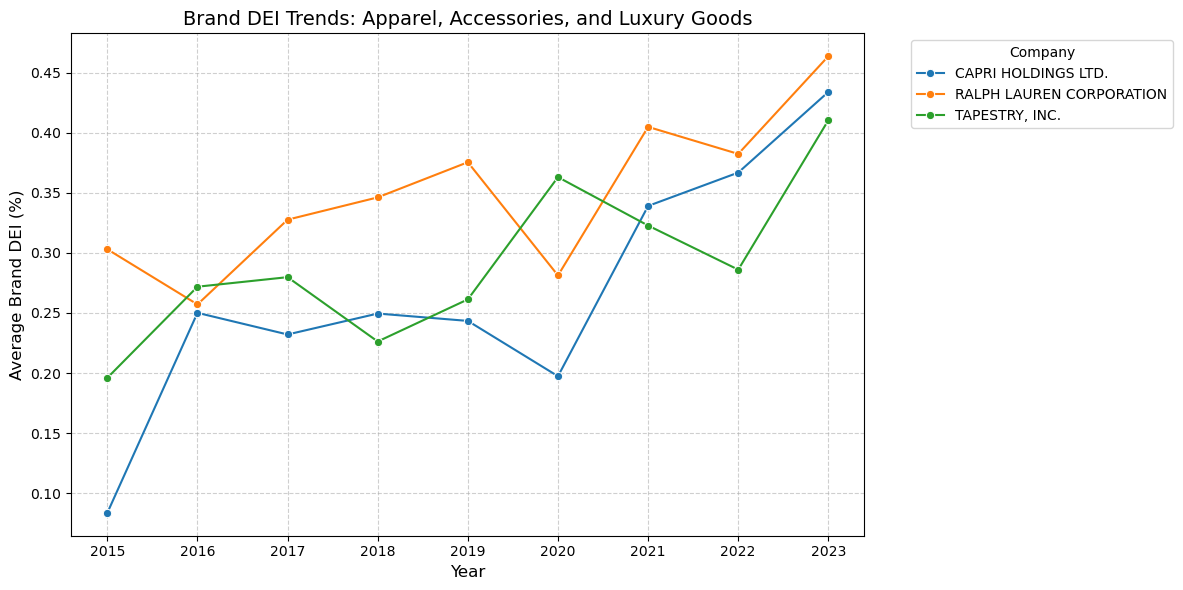

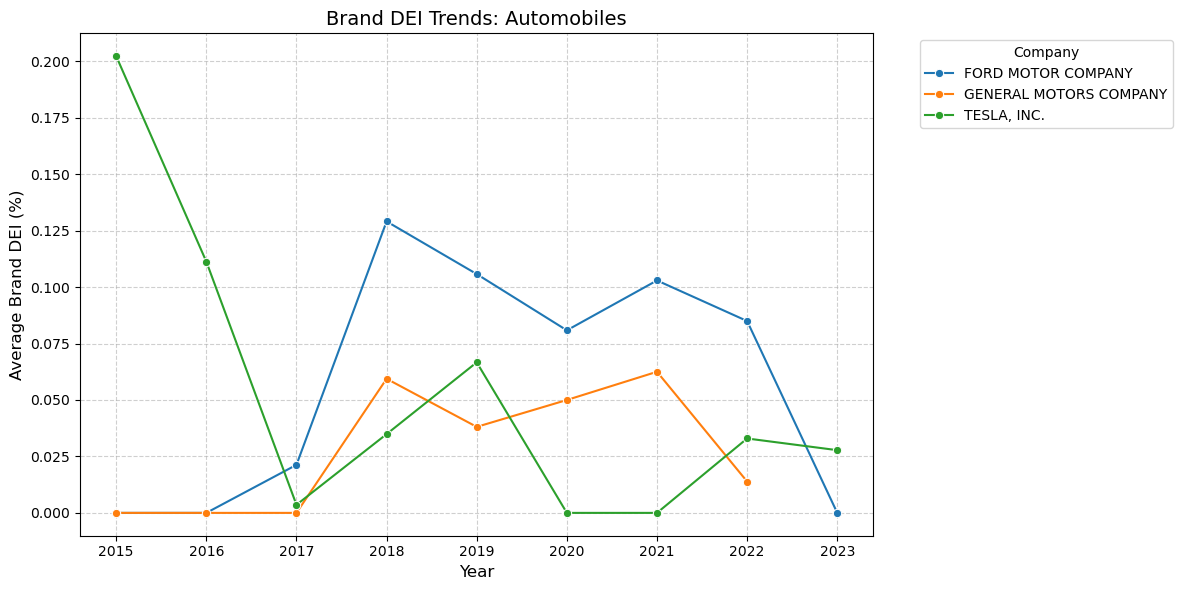

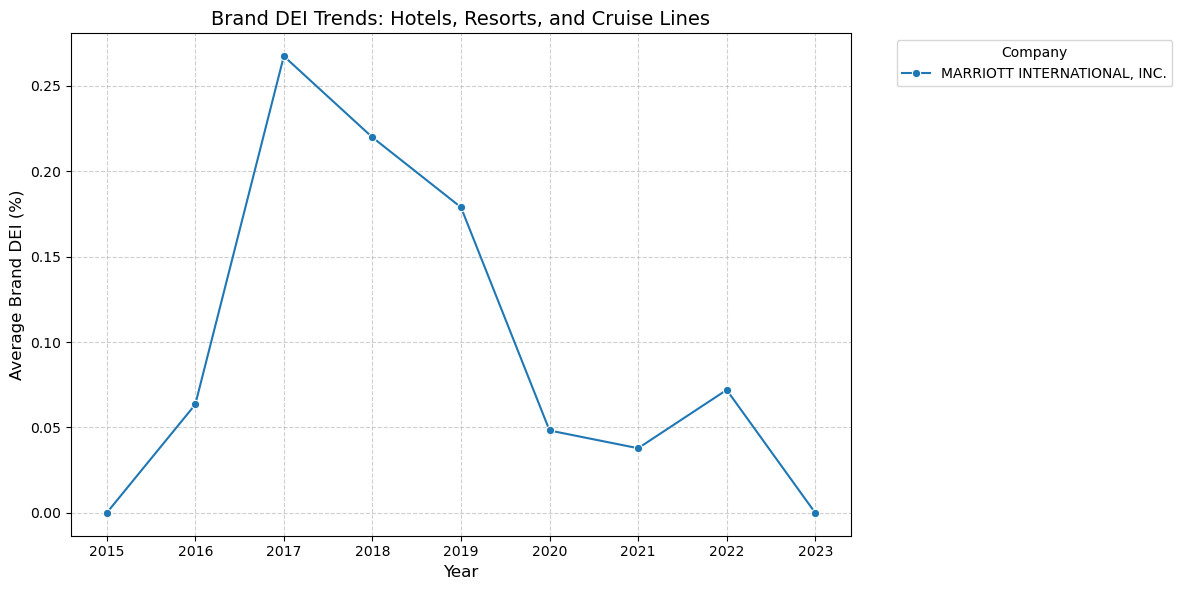

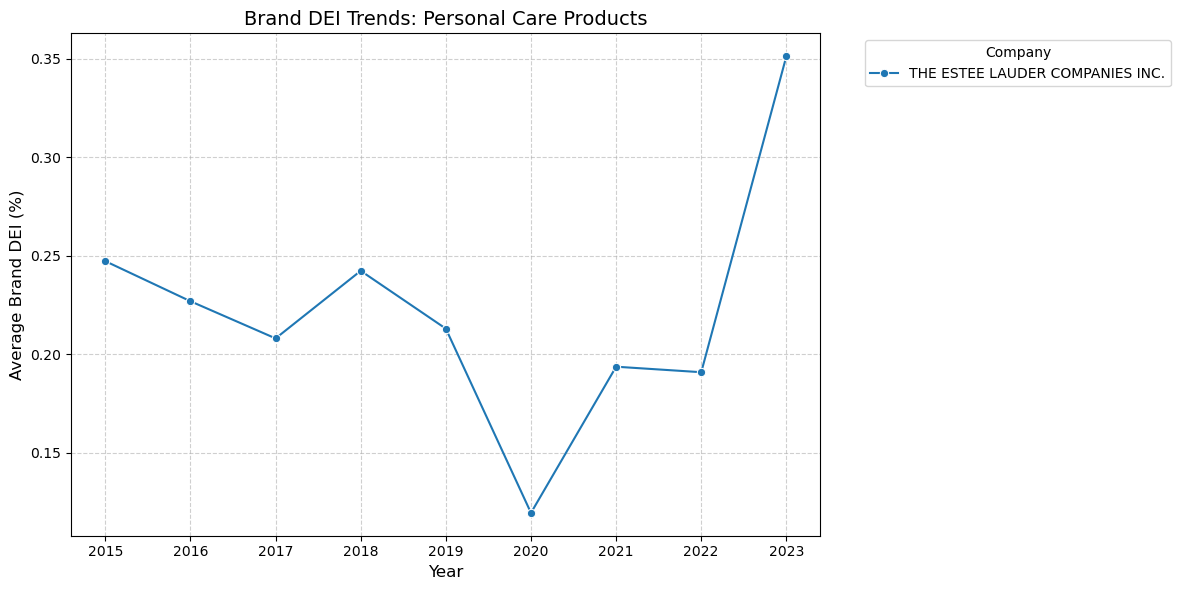

In [272]:
# Convert week_end_date to datetime
data['week_end_date'] = pd.to_datetime(data['week_end_date'])

filtered_data = data[data['company_name'] != 'PVH CORP.']

# Aggregate to yearly averages for Board and Brand DEI
filtered_data['year'] = filtered_data['week_end_date'].dt.year
yearly_data = filtered_data.groupby(['year', 'Industry', 'company_name'], as_index=False).agg({
    'dei_dir_perc': 'mean',  # Average Board DEI
    'dei_brand_percn': 'mean'  # Average Brand DEI
})

# Get the list of unique industries
industries = yearly_data['Industry'].unique()

# Plot for each industry (Board DEI)
for industry in industries:
    industry_subset = yearly_data[yearly_data['Industry'] == industry]

    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=industry_subset,
        x='year',
        y='dei_dir_perc',
        hue='company_name',
        marker='o'
    )
    plt.title(f'Board DEI Trends: {industry}', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Board DEI (%)', fontsize=12)
    plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


# Plot for each industry (Brand DEI).
for industry in industries:
    # Filter the dataset for the industry.
    industry_subset = yearly_data[(yearly_data['Industry'] == industry) & (yearly_data['company_name'] != 'PVH CORP.')]
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=industry_subset,
        x='year',
        y='dei_brand_percn',
        hue='company_name',
        marker='o'
    )
    plt.title(f'Brand DEI Trends: {industry}', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Brand DEI (%)', fontsize=12)
    plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



| **Industry**                        | **Company**                     | **Board Insights**                                                                                      | **Brand Insights**                                                                                      | **Key Takeaway**                                                                                         |
|-------------------------------------|----------------------------------|---------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------|
| **Apparel, Accessories, and Luxury Goods** | **Capri Holdings Ltd.**          | Decline from 2015 to 2018; gradual improvement from 2019, steady upward trend by 2023.                  | Consistent improvement since 2015, steady growth through 2023.                                         | Industry shows steady improvement in board diversity, with notable progress post-2020.                  |
|                                     | **Ralph Lauren Corporation**     | Consistently low diversity until 2020; noticeable increase post-2020, reflecting recent DEI focus.      | Significant growth after 2016, consistently leading in recent years.                                   | Positive trajectory in brand DEI, with Ralph Lauren emerging as the leader.                             |
|                                     | **Tapestry, Inc.**               | Highest diversity among peers; peak in 2019, slight dips, but maintains DEI leadership.                | Moderate fluctuations, steady upward trend post-2020.                                                  |                                                                                                          |
| **Automobile**                      | **Ford Motor Company**           | Minimal change, consistently low board diversity.                                                       | Gradual improvement from 2016 to 2021; decline post-2021.                                              | Mixed progress, with General Motors leading board diversity improvement efforts.                        |
|                                     | **General Motors Company**       | Steady increase from 2015, significant upward trend post-2020.                                          | Modest increases starting 2017, slight dip in 2022.                                                    | Limited progress in brand DEI, with inconsistent trends and overall low representation.                 |
|                                     | **Tesla, Inc.**                  | Fluctuations, peaks in 2019 and 2022, no clear upward trajectory.                                       | Steep decline after 2015, consistently low in recent years.                                             |                                                                                                          |
| **Hotels, Resorts, and Cruise Lines** | **Marriott International, Inc.** | Gradual increase from 2015 to 2018, peak at 29%; sharp decline in 2019, recovery post-2021.             | Rapid growth from 2015 to 2017, peaking at 25%; significant decline from 2018, near-zero by 2023.       | Inconsistent trends, with Marriott recovering board diversity but failing to maintain brand DEI.        |
| **Personal Care Products**          | **The Estée Lauder Companies Inc.** | Sharp decline in board diversity from 2015 to 2019; gradual recovery post-2020, reaching 2015 levels. | Decline from 2015 to 2019, hitting a low in 2020; significant recovery and rapid growth post-2021.      | Renewed focus on board and brand diversity post-2020, with a strong resurgence led by Estée Lauder.     |


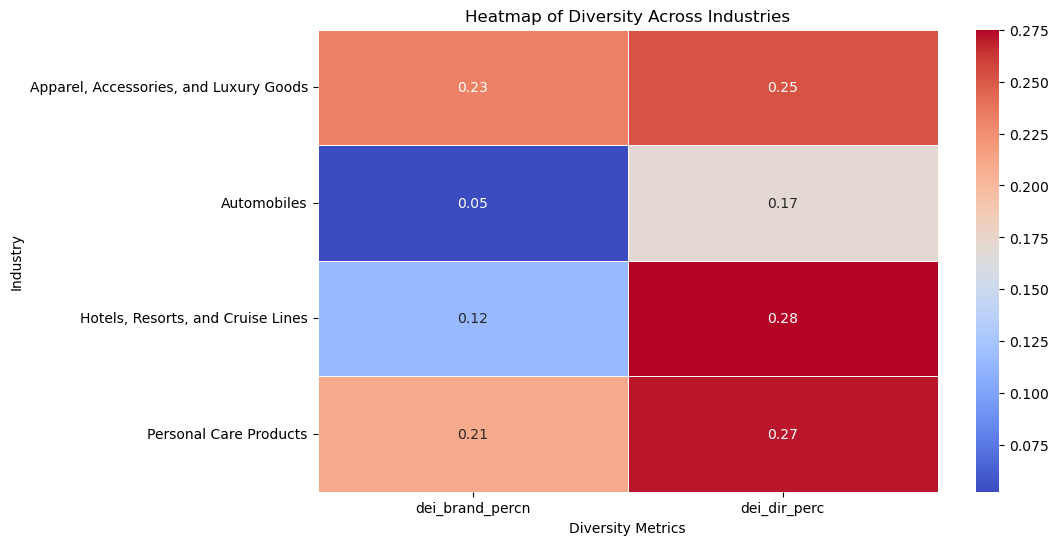

In [226]:
# Pivot table for heatmap
industry_pivot = industry_data.pivot_table(index='Industry', values=['dei_dir_perc', 'dei_brand_percn'], aggfunc='mean')

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(industry_pivot, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Diversity Across Industries')
plt.xlabel('Diversity Metrics')
plt.ylabel('Industry')
plt.show()


#### Insights

Industries show differing alignment between board and brand DEI, with Automobiles displaying the largest gap, emphasizing the need for improvement in branding DEI efforts. Visual clearly depicts these disparities.

In [249]:
### Linear Regression Analysis ###

# Base Model

# Define variables for the base model
X_base = data['dei_dir_perc']  # Independent variable: Board DEI %
y_base = data['dei_brand_percn']  # Dependent variable: Brand DEI %

# Add constant for OLS regression
X_base = sm.add_constant(X_base)

# Fit regression model
base_model = sm.OLS(y_base, X_base).fit()

# Display regression results
print("\nBase Model Regression Results:")
print(base_model.summary())

# Extract coefficients (excluding constant for visualization)
base_coefficients = base_model.params[1:]  # Exclude the constant term
base_variables = ['dei_dir_perc']  # Corresponding variable name



Base Model Regression Results:
                            OLS Regression Results                            
Dep. Variable:        dei_brand_percn   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     281.0
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           1.92e-61
Time:                        18:03:09   Log-Likelihood:                -55.681
No. Observations:                5115   AIC:                             115.4
Df Residuals:                    5113   BIC:                             128.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           

                            OLS Regression Results                            
Dep. Variable:        dei_brand_percn   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     60.03
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           5.94e-61
Time:                        18:02:51   Log-Likelihood:                -46.513
No. Observations:                5115   AIC:                             105.0
Df Residuals:                    5109   BIC:                             144.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
dei_dir_perc          0.4887      0.03

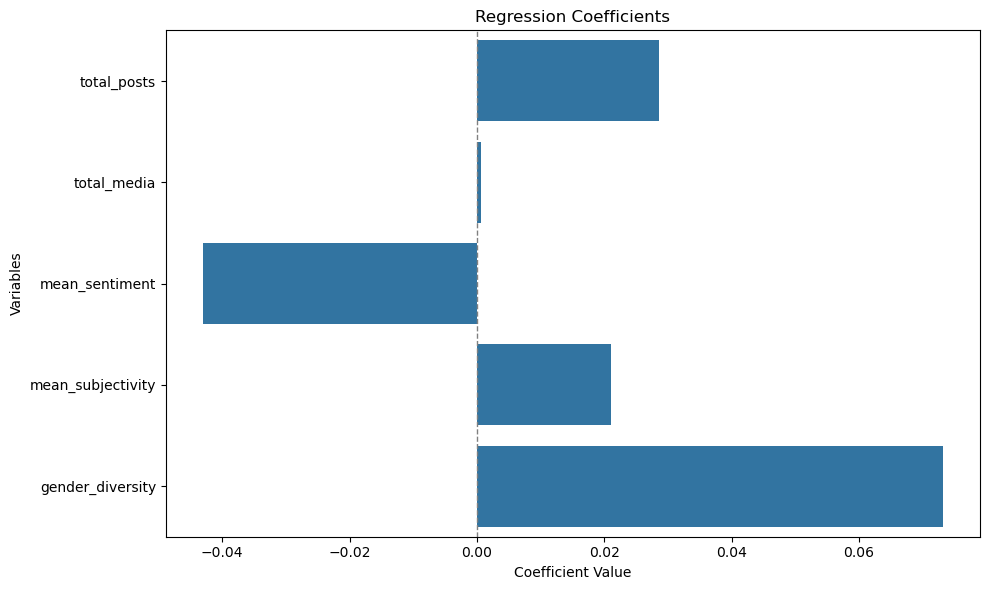

In [229]:
### Linear Regression Analysis ###

# Enhanced Model

# Regression model, including sentiment, subjectivity, and gender diversity metrics. These controls account for additional factors that might influence branding DEI.

# Create a 'week' column from 'week_end_date'
data['week'] = pd.to_datetime(data['week_end_date']).dt.to_period('W')

# Calculate Total Posts per Week per Brand
data['total_posts'] = data.groupby(['author.name', 'week'])['Sl'].transform('count')

# Calculate Total Media Attachments per Week per Brand
data['total_media'] = data.groupby(['author.name', 'week'])['tweet_media_attachment_count'].transform('sum')

# Additional Controls
# Example controls: sentiment, subjectivity and gender diversity metrics
data['mean_sentiment'] = data.groupby(['author.name', 'week'])['text_sentiment'].transform('mean')
data['mean_subjectivity'] = data.groupby(['author.name', 'week'])['text_subjectivity'].transform('mean')
data['gender_diversity'] = data['female'] / data['total_dir']  # Female to total directors ratio

# Define Variables for Regression
# Independent Variables (Add a constant for the regression intercept)
X = data[['dei_dir_perc', 'total_posts', 'total_media', 'mean_sentiment', 'mean_subjectivity', 'gender_diversity']]
X = sm.add_constant(X)

# Dependent Variable
y = data['dei_brand_percn']

# Fit the Regression Model
model = sm.OLS(y, X).fit()

# Print Regression Results
print(model.summary())

# Visualization: Coefficient Plot
coefficients = model.params[1:]  # Exclude the constant term
variables = X.columns[1:]  # Exclude the constant column

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.values, y=variables)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


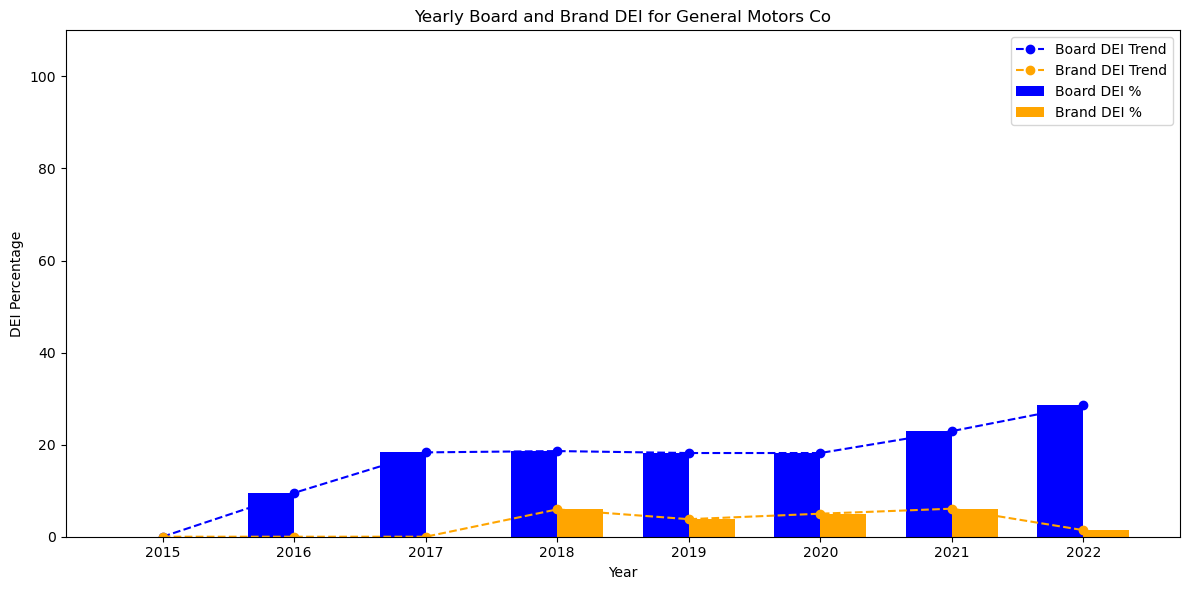

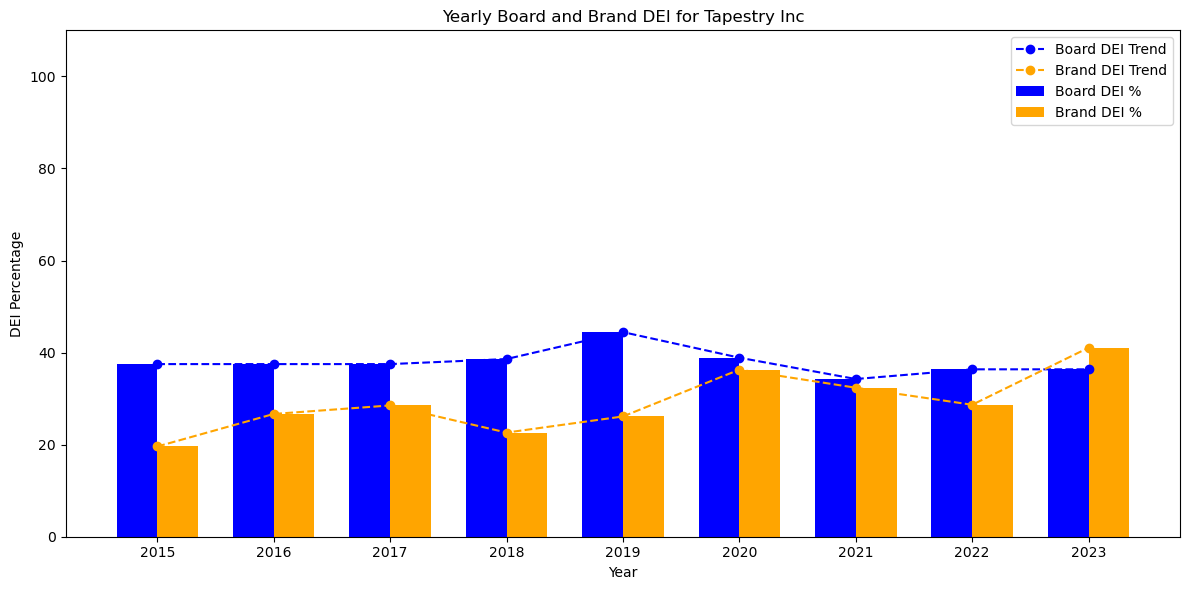

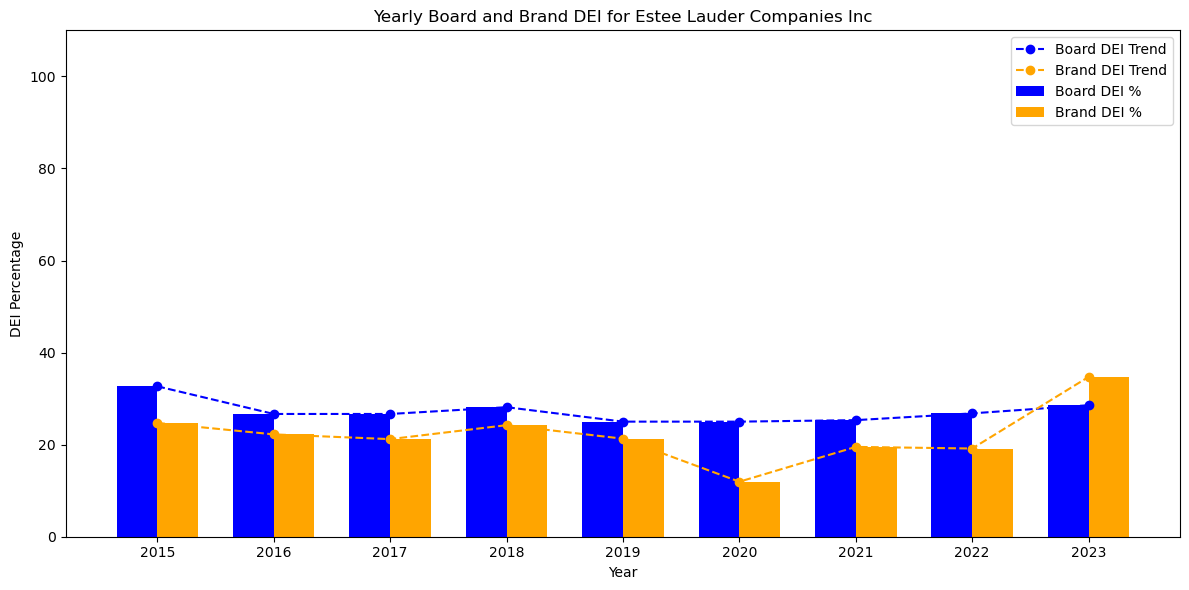

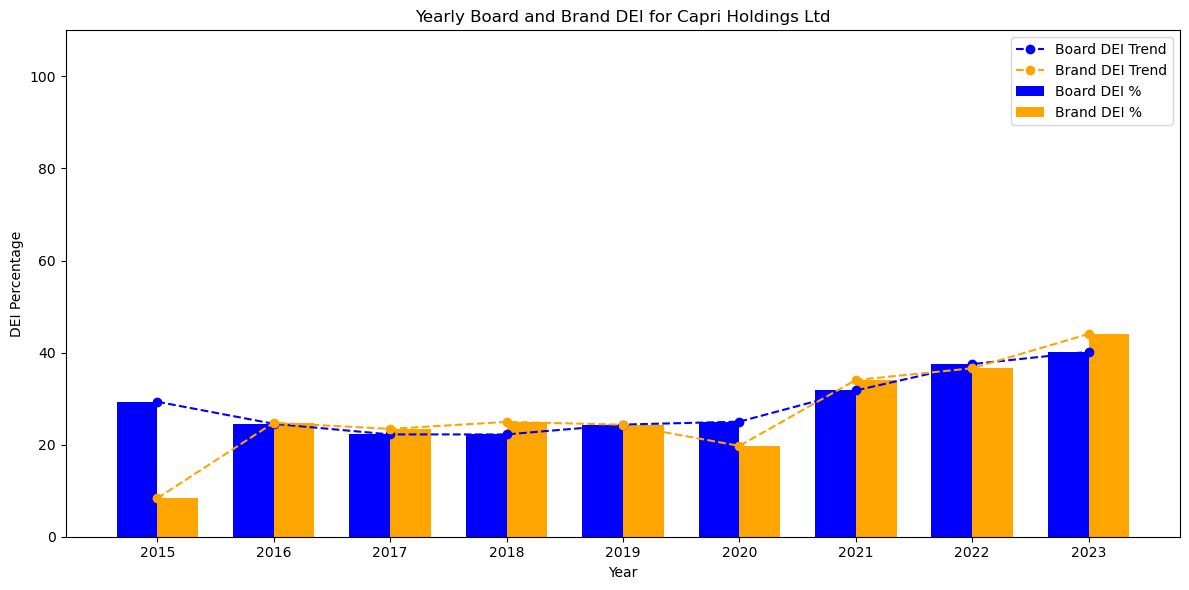

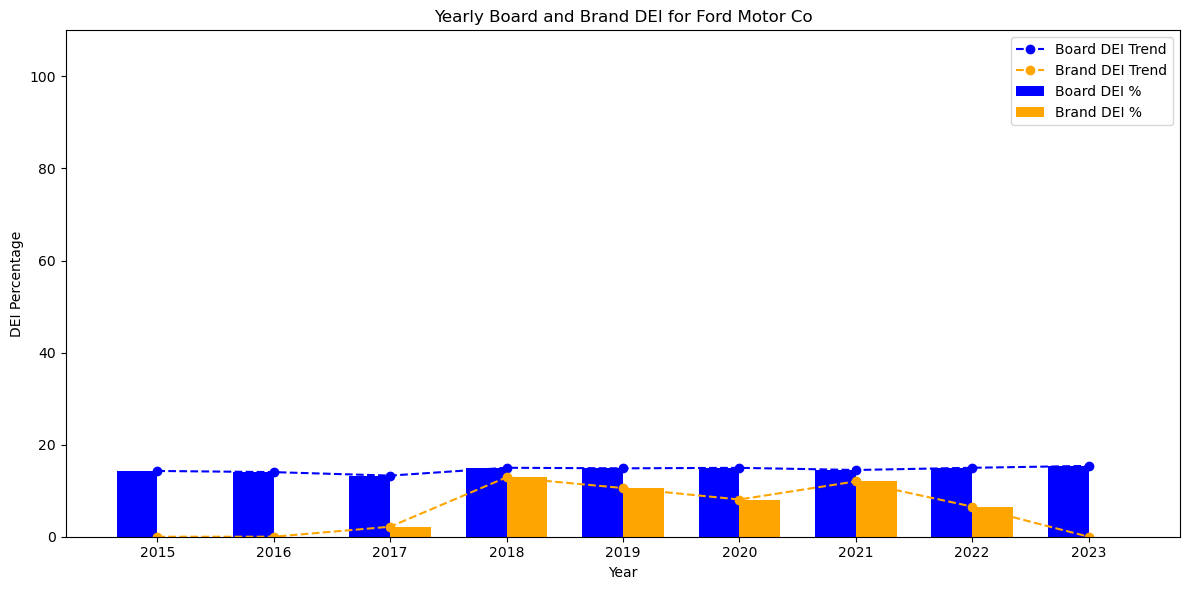

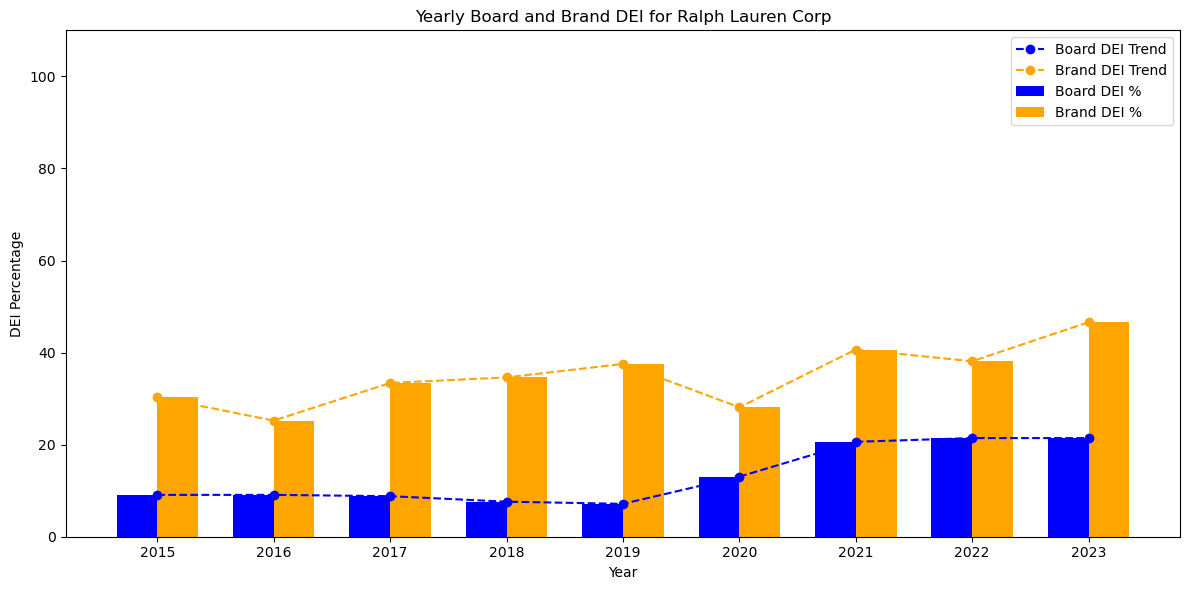

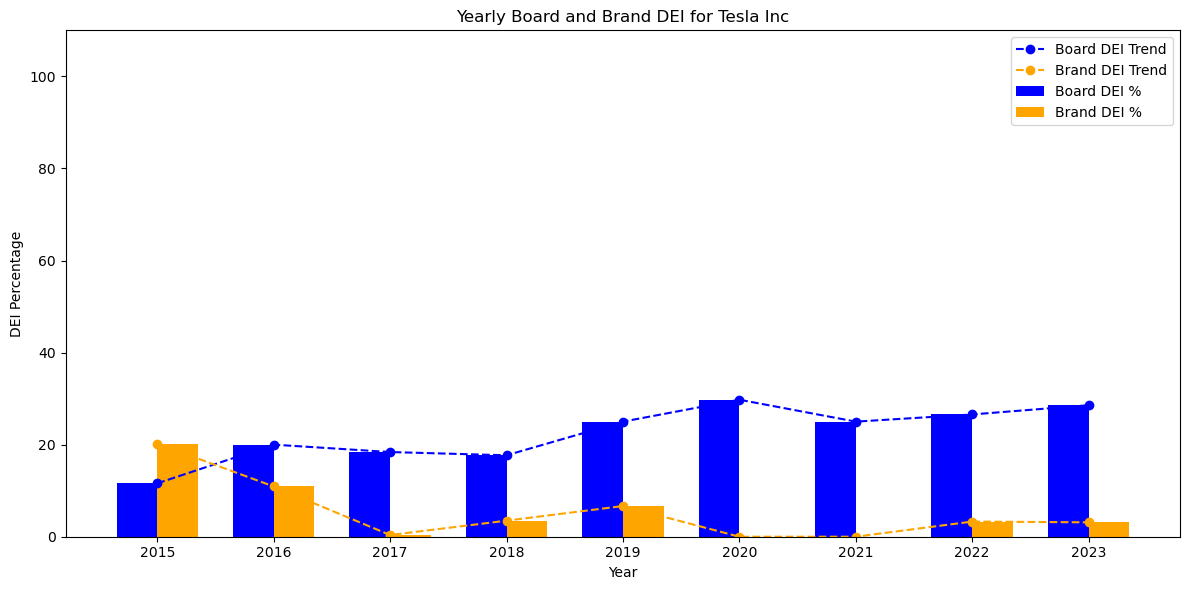

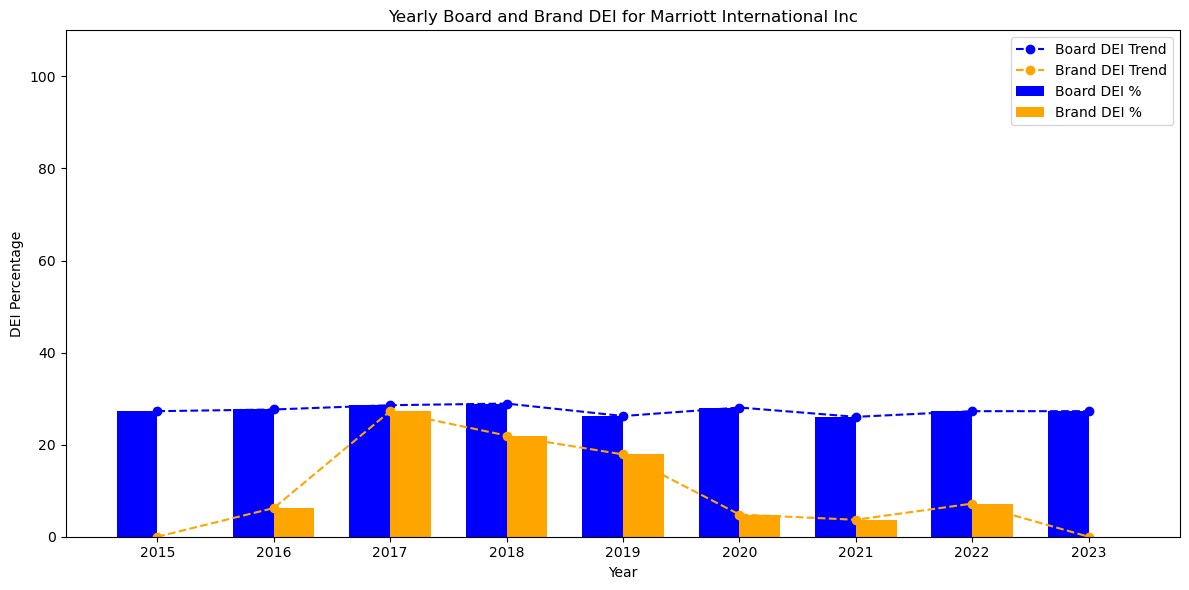

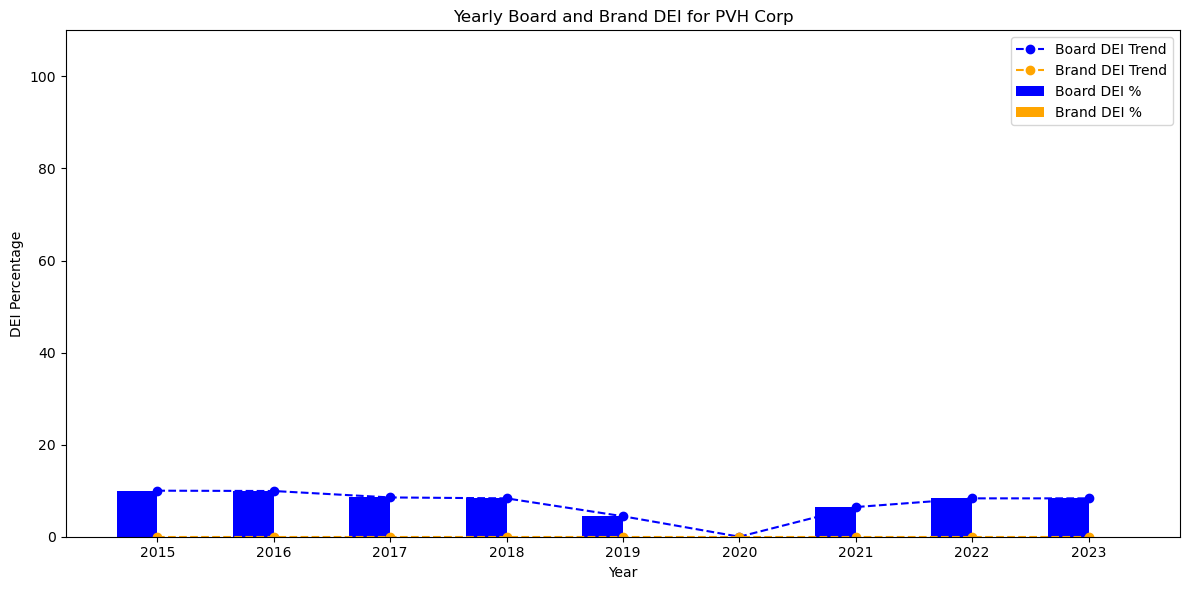

In [230]:
# Company-wise yearly fluctuation of board and brand DEI percentages with trend lines
years = range(2015, 2023)

# Exclude PVH CORP
filtered_data = data[data['company'] != 'PVH CORP.']

for company in filtered_data['company'].unique():
    company_data = filtered_data[filtered_data['company'] == company]
    yearly_summary = company_data.groupby('year').agg({
        'dei_dir_perc': 'mean',  # Average Board DEI %
        'dei_brand_percn': 'mean'  # Average Brand DEI %
    }).reset_index()

    # Convert to percentages
    yearly_summary['dei_dir_perc'] *= 100
    yearly_summary['dei_brand_percn'] *= 100

    # Plot
    plt.figure(figsize=(12, 6))
    width = 0.35  # Bar width
    bar1 = plt.bar(yearly_summary['year'] - width/2, yearly_summary['dei_dir_perc'], width, label='Board DEI %', color='blue')
    bar2 = plt.bar(yearly_summary['year'] + width/2, yearly_summary['dei_brand_percn'], width, label='Brand DEI %', color='orange')

    # Add trend lines
    plt.plot(yearly_summary['year'], yearly_summary['dei_dir_perc'], color='blue', linestyle='--', marker='o', label='Board DEI Trend')
    plt.plot(yearly_summary['year'], yearly_summary['dei_brand_percn'], color='orange', linestyle='--', marker='o', label='Brand DEI Trend')

    plt.title(f'Yearly Board and Brand DEI for {company}')
    plt.xlabel('Year')
    plt.ylabel('DEI Percentage')
    plt.xticks(yearly_summary['year'])
    plt.ylim(0, 110)  # Adjust y-axis to show percentages
    plt.legend()
    plt.tight_layout()
    plt.show()



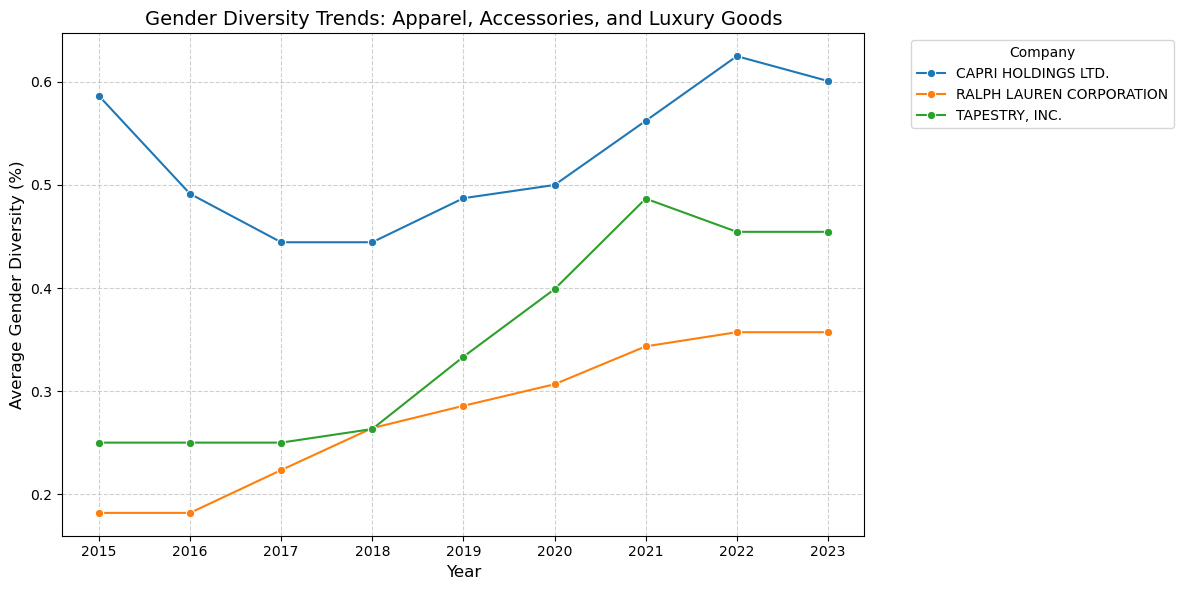

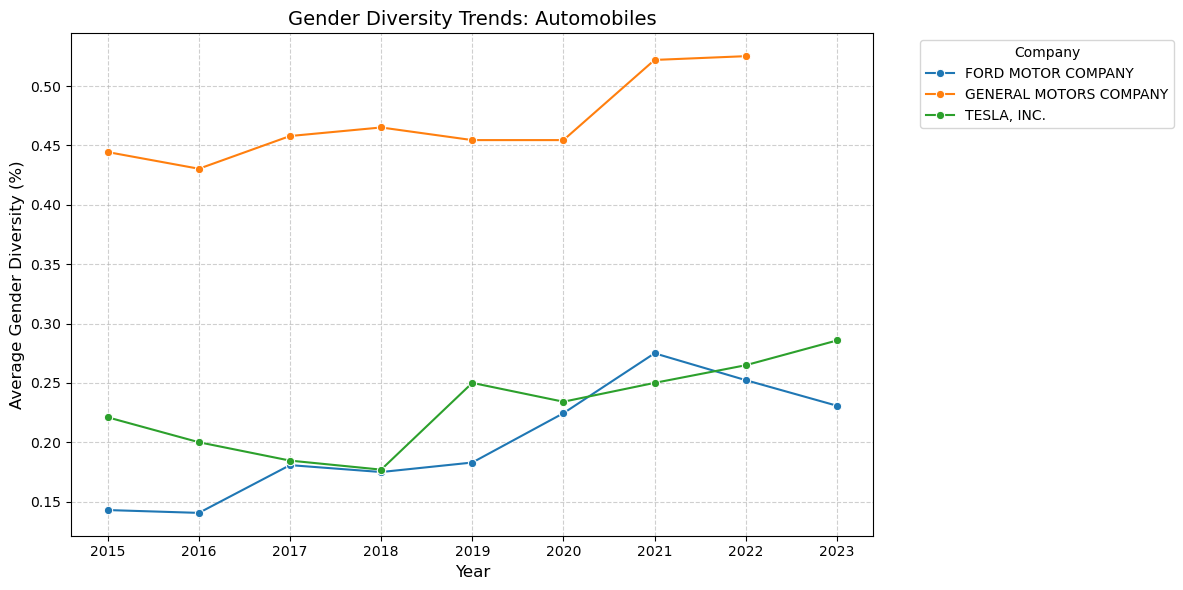

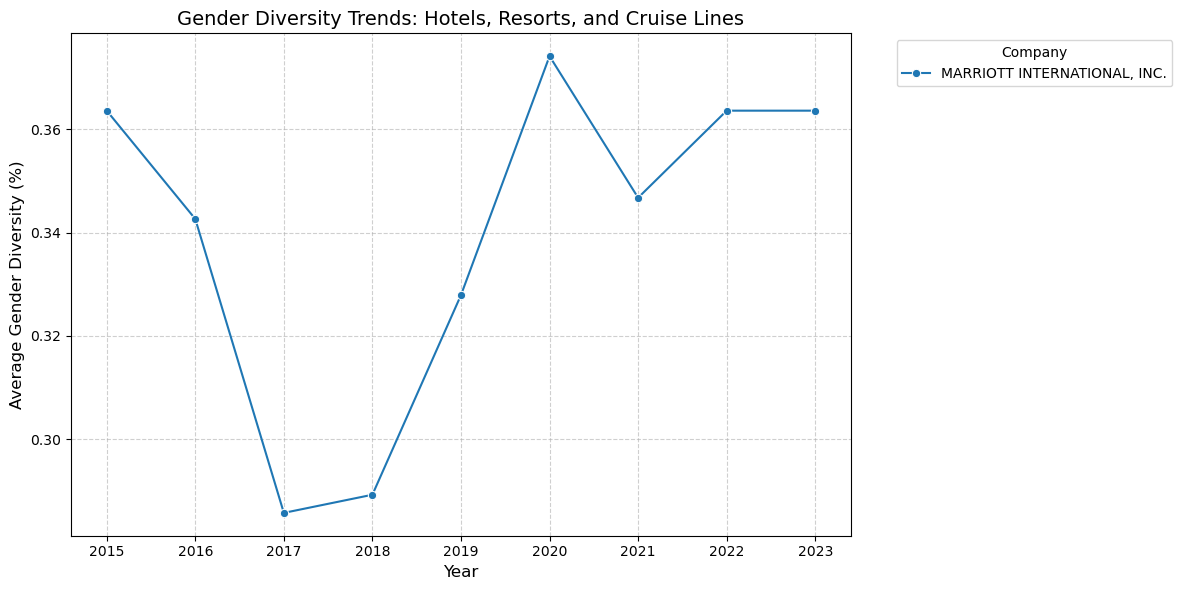

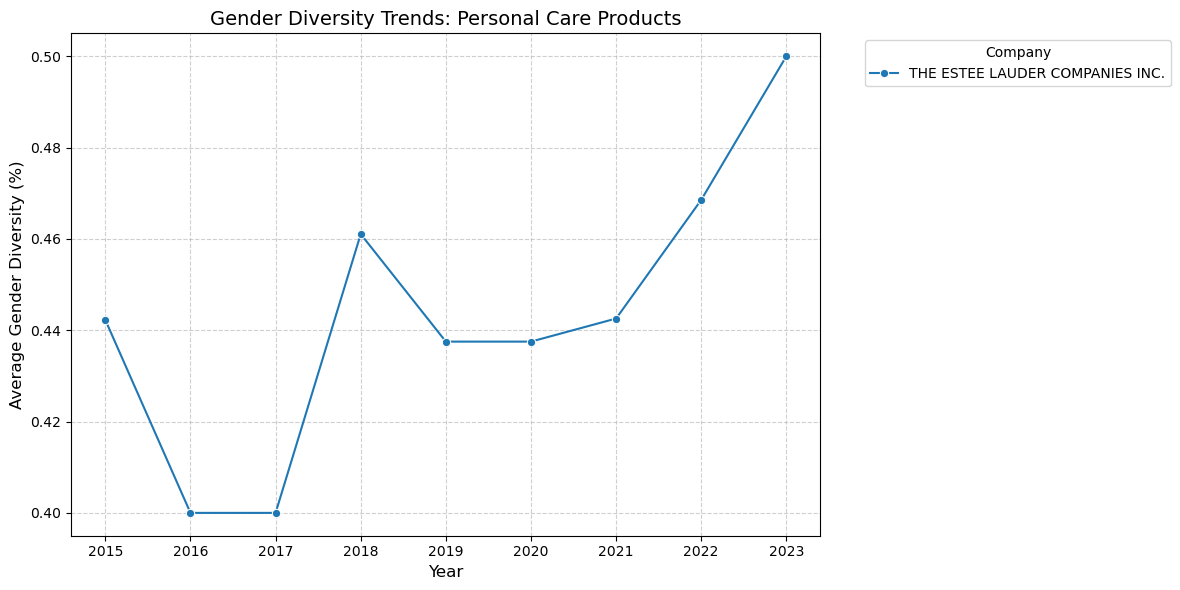

In [276]:
# Convert week_end_date to datetime
data['week_end_date'] = pd.to_datetime(data['week_end_date'])

filtered_data = data[data['company_name'] != 'PVH CORP.']

# Calculate Gender Diversity (female directors / total directors)
filtered_data['gender_diversity'] = filtered_data['female'] / filtered_data['total_dir']

# Aggregate to yearly averages for Gender Diversity
filtered_data['year'] = filtered_data['week_end_date'].dt.year
yearly_gender_data = filtered_data.groupby(['year', 'Industry', 'company_name'], as_index=False).agg({
    'gender_diversity': 'mean'  # Average Gender Diversity
})

# Get the list of unique industries
industries = yearly_gender_data['Industry'].unique()

# Plot for each industry (Gender Diversity)
for industry in industries:
    industry_subset = yearly_gender_data[yearly_gender_data['Industry'] == industry]

    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=industry_subset,
        x='year',
        y='gender_diversity',
        hue='company_name',
        marker='o'
    )
    plt.title(f'Gender Diversity Trends: {industry}', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Gender Diversity (%)', fontsize=12)
    plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
